In [1]:
# %pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\austinsh\AppData\Local\Temp\ipykernel_35440\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
#df_outlierHandling = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_outlierHandling.csv')

df_outlierHandling = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\adjusted_Limits.csv')

# Print descriptive statistics for df_outlierHandling
df_outlierHandling.describe()

425_pct_Al         Al2O3    C4_pct_Eth    C4_pct_H2O    C4_pct_Hex  \
count  82888.000000  82888.000000  82888.000000  82888.000000  82888.000000   
mean       6.067883     11.282832      1.561971     21.012659      0.521339   
std        0.581750      0.604353      4.002211      4.507376      0.777958   
min        0.037102      8.710000      0.001000      0.057000      0.000000   
25%        5.980275     10.897300      0.643115     18.375575      0.323286   
50%        6.129155     11.435700      1.175200     20.795250      0.426301   
75%        6.277975     11.670800      1.657680     23.007300      0.531902   
max        8.058320     12.907000     90.136000     95.818000     13.392400   

            DI55102       DI55152       DI55580       FC55003       FC55569  \
count  82888.000000  82888.000000  82888.000000  82888.000000  82888.000000   
mean       0.946988      0.940055      0.996303   4688.925313   5264.747422   
std        0.055889      0.041684      0.048850   2623.263618   2657.709650   
min        0.800002      0.753114      0.675018      0.000000      0.000000   
25%        0.910066      0.914531      0.966440   4134.605000   5939.900000   
50%        0.953143      0.938121      0.995610   5677.965000   6463.335000   
75%        0.988742      0.963343      1.028262   6380.740000   6749.255000   
max        1.192060      1.214180      1.165180  20772.500000  10929.000000   

            FC55576      FFC55555       LC90366       PI55020  
count  82888.000000  82888.000000  82888.000000  82888.000000  
mean     300.988808      0.603417     46.367388     -1.135314  
std      277.898177      0.318799     27.192318      1.236350  
min        0.000000      0.000000      0.000000     -9.653360  
25%        2.286200      0.727797     24.357325     -2.081270  
50%      286.276500      0.761364     48.482900     -0.837891  
75%      467.400250      0.780830     70.469900     -0.008236  
max     1463.170000      1.000000     87.901600      8.127770

In [5]:
num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 15


In [6]:
# # Assuming df_outlierHandling is your DataFrame
# non_date_columns = df_outlierHandling.columns[df_outlierHandling.columns != 'Date']

# # Drop rows where any value (excluding 'Date') is 0 or less
# df_outlierHandling = df_outlierHandling.drop(df_outlierHandling[(df_outlierHandling[non_date_columns] <= 100).any(axis=1)].index)

# df_outlierHandling



In [7]:
df_outlierHandling['Date'] = pd.to_datetime(df_outlierHandling['Date'])
print(df_outlierHandling.dtypes)

# Output after conversion:
# date_datetime64    datetime64[ns]
# date_object        datetime64[ns]
# dtype: object


Date          datetime64[ns]
425_pct_Al           float64
Al2O3                float64
C4_pct_Eth           float64
C4_pct_H2O           float64
C4_pct_Hex           float64
DI55102              float64
DI55152              float64
DI55580              float64
FC55003              float64
FC55569              float64
FC55576              float64
FFC55555             float64
LC90366              float64
PI55020              float64
dtype: object


Skipping datetime column: Date


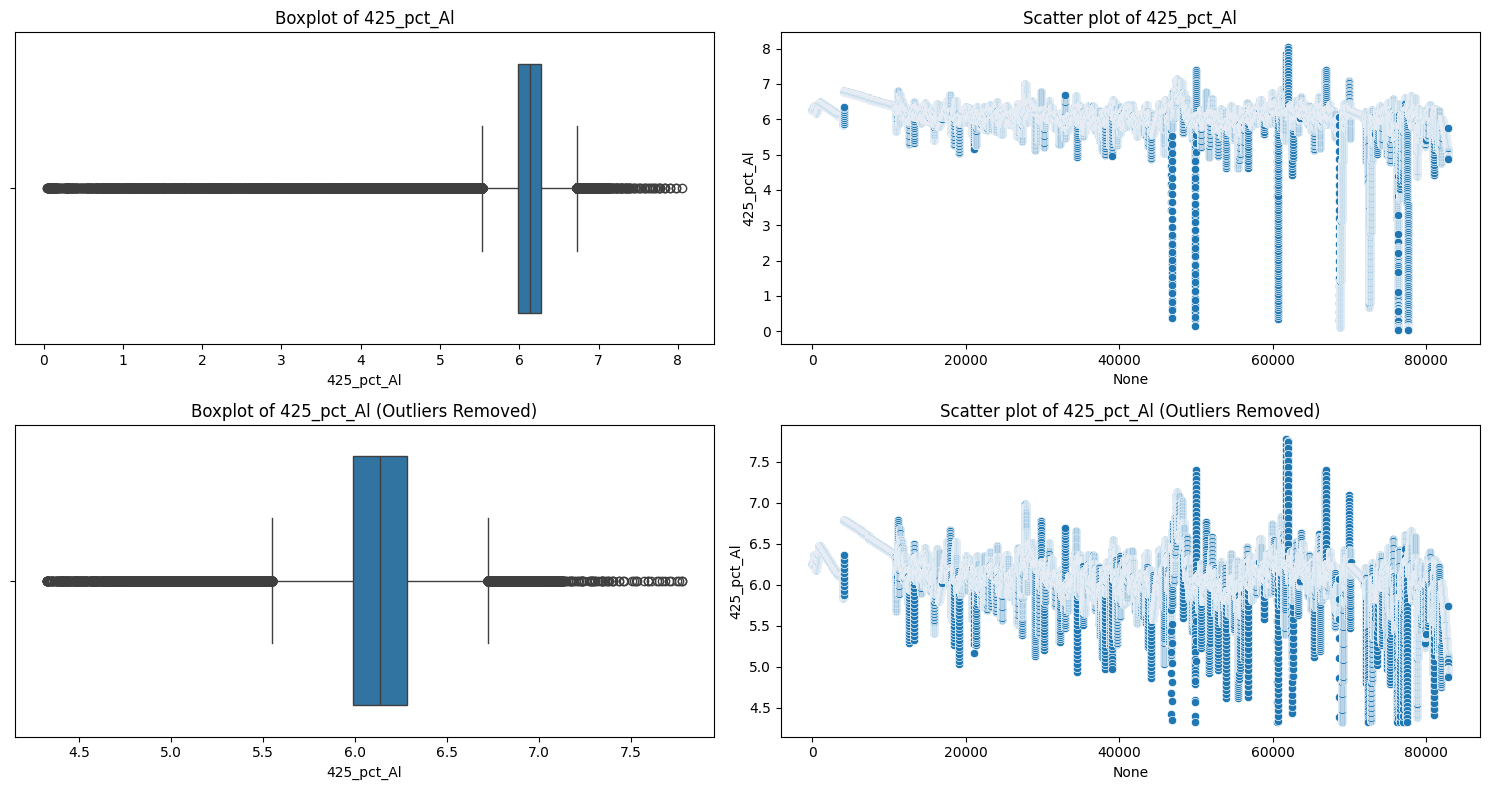

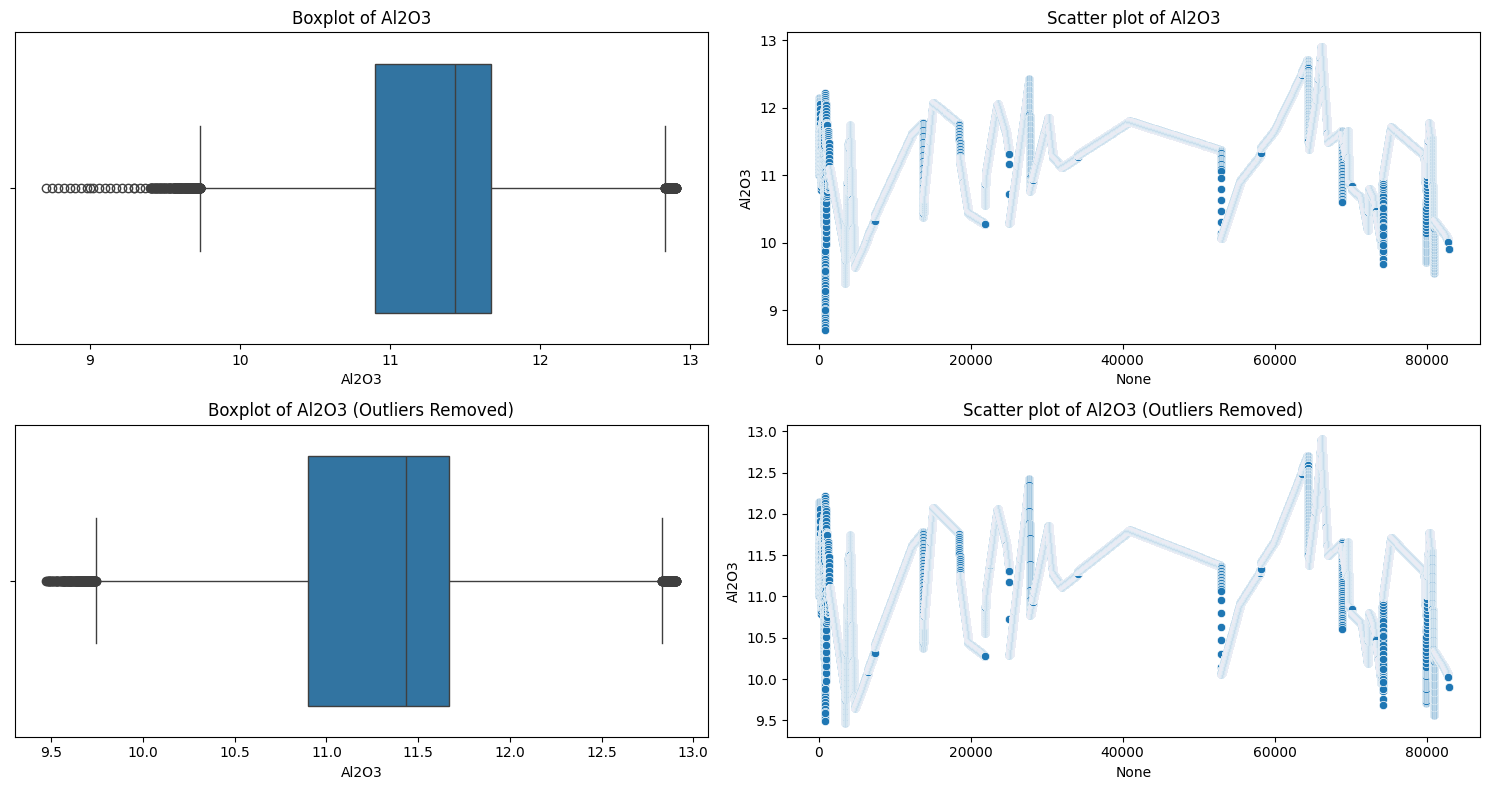

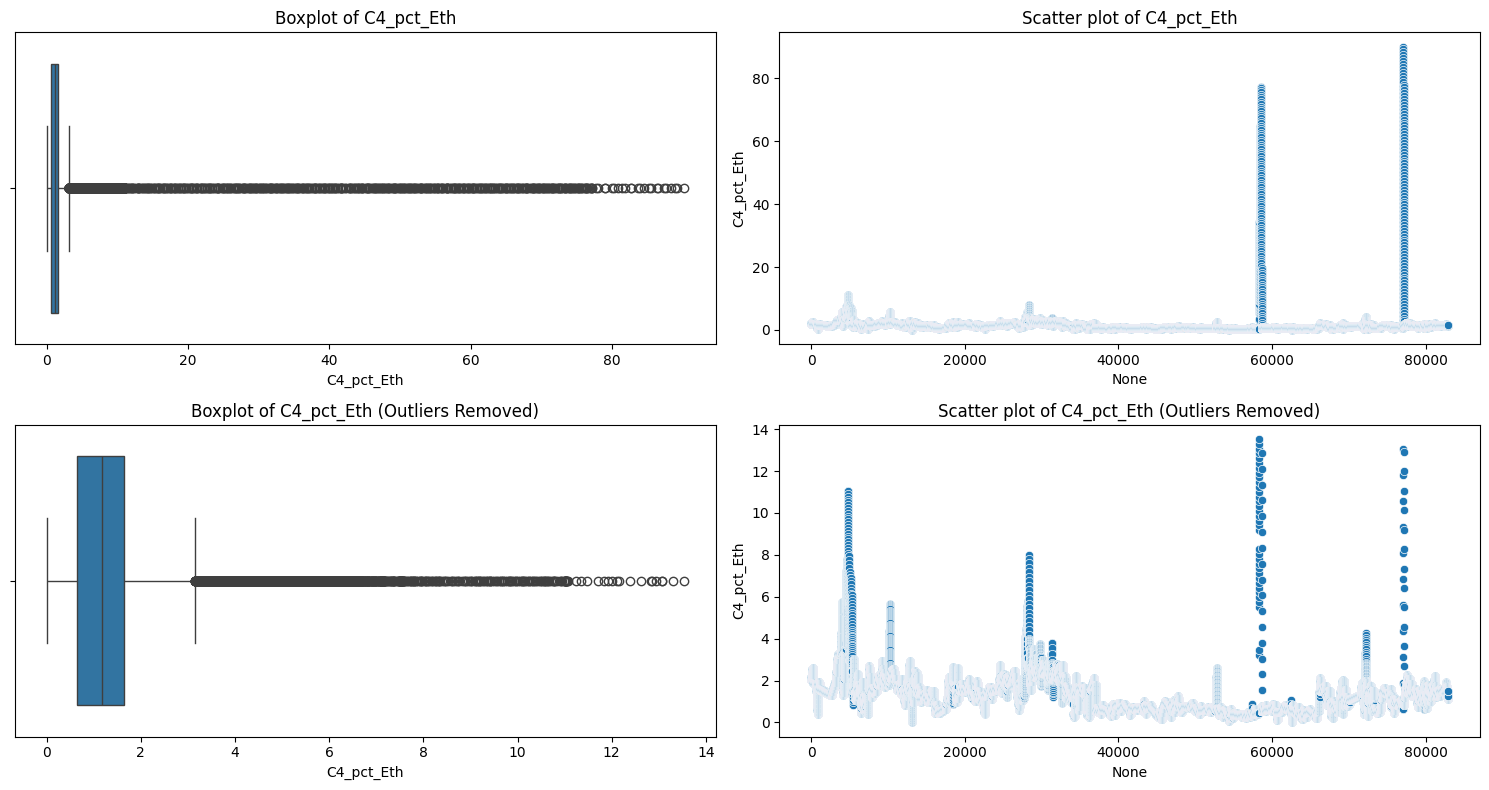

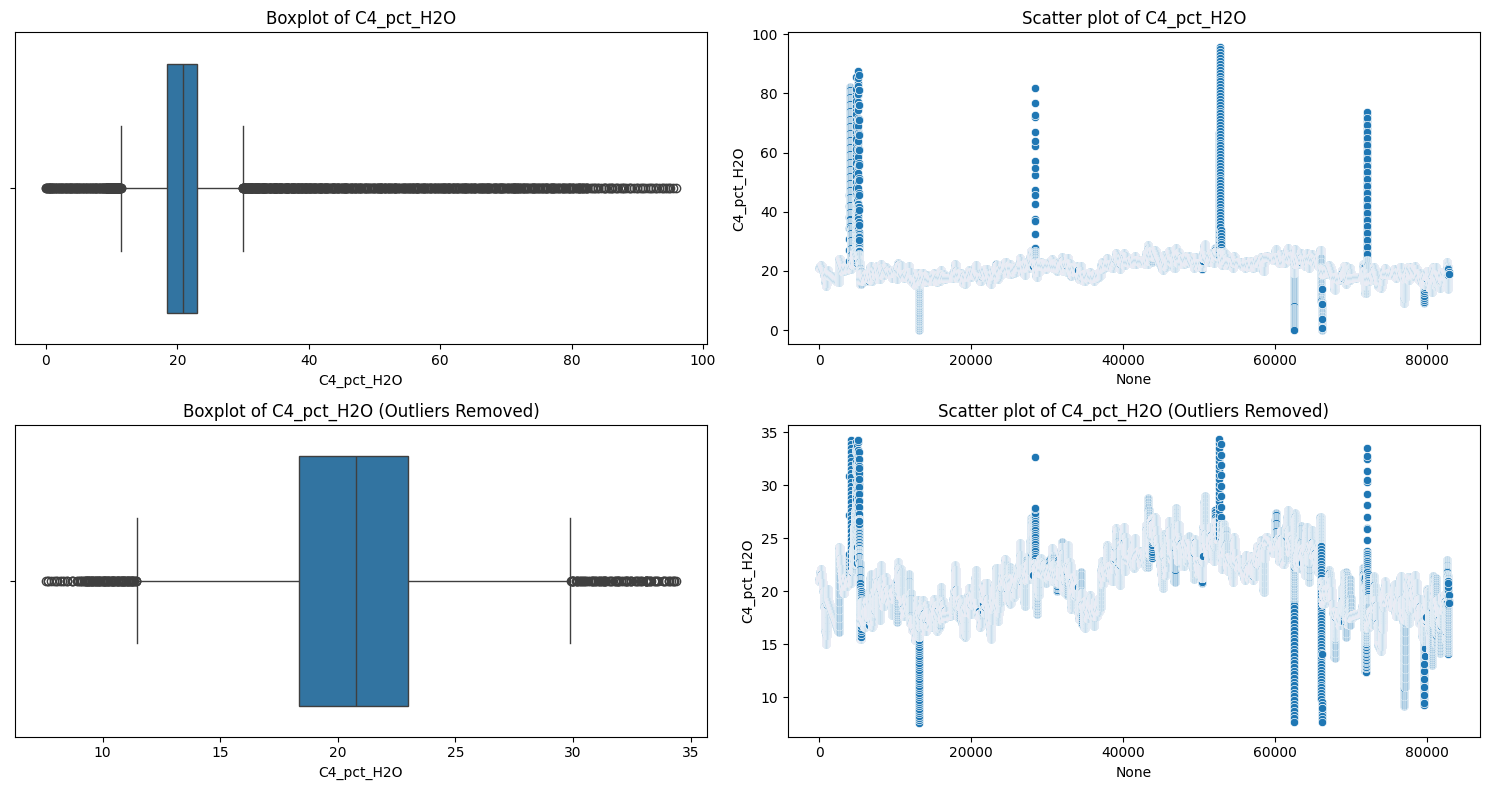

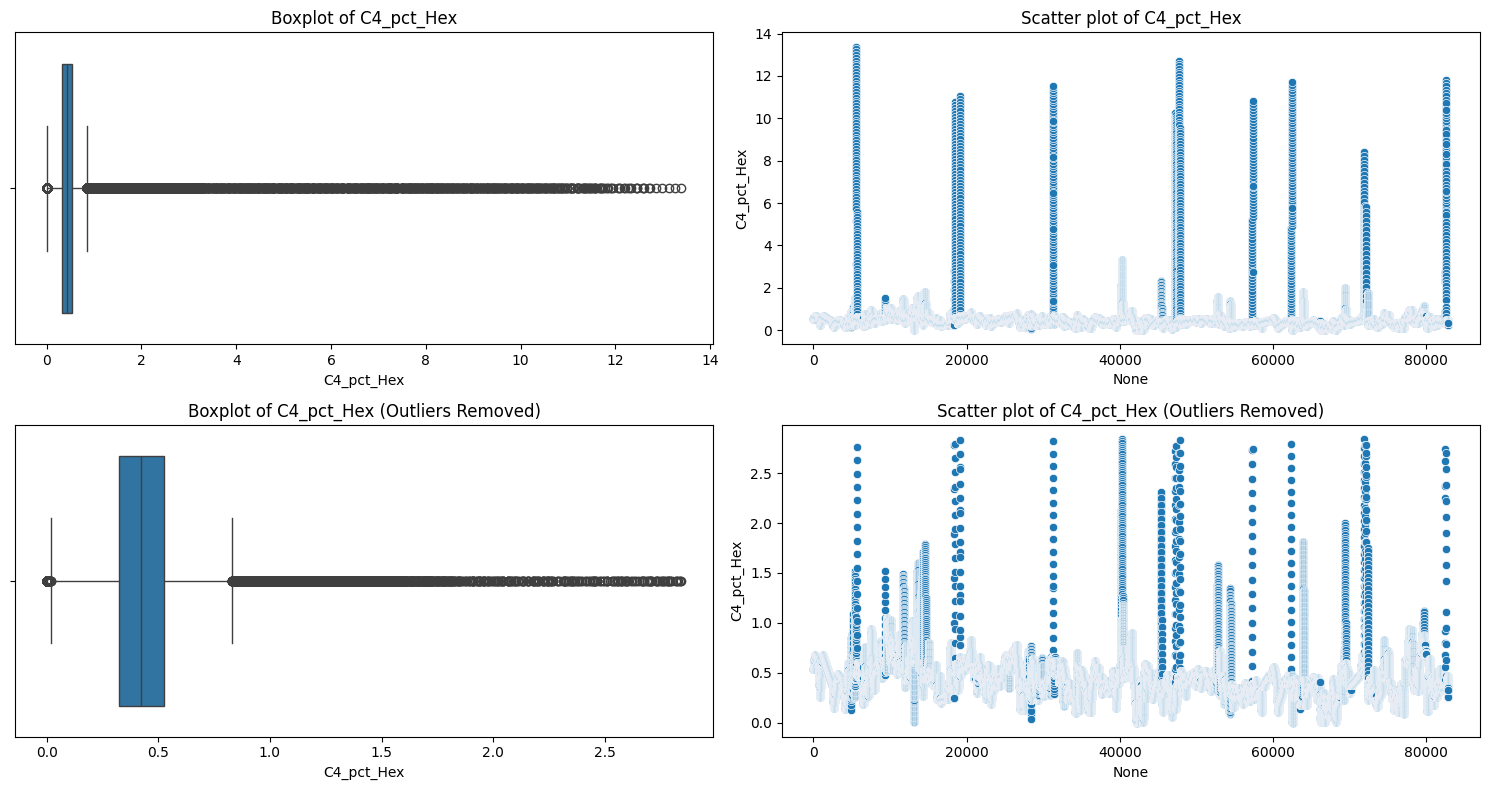

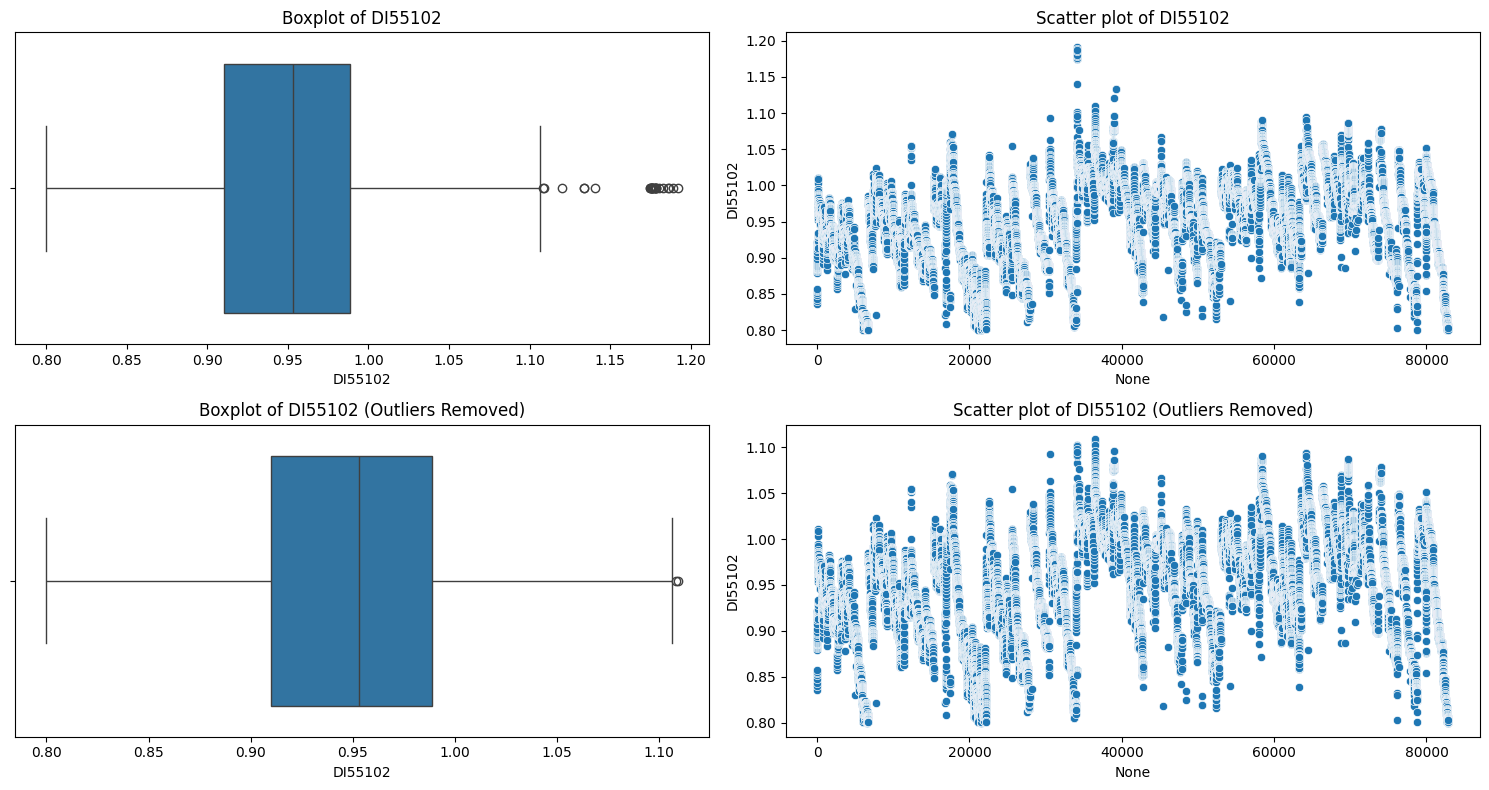

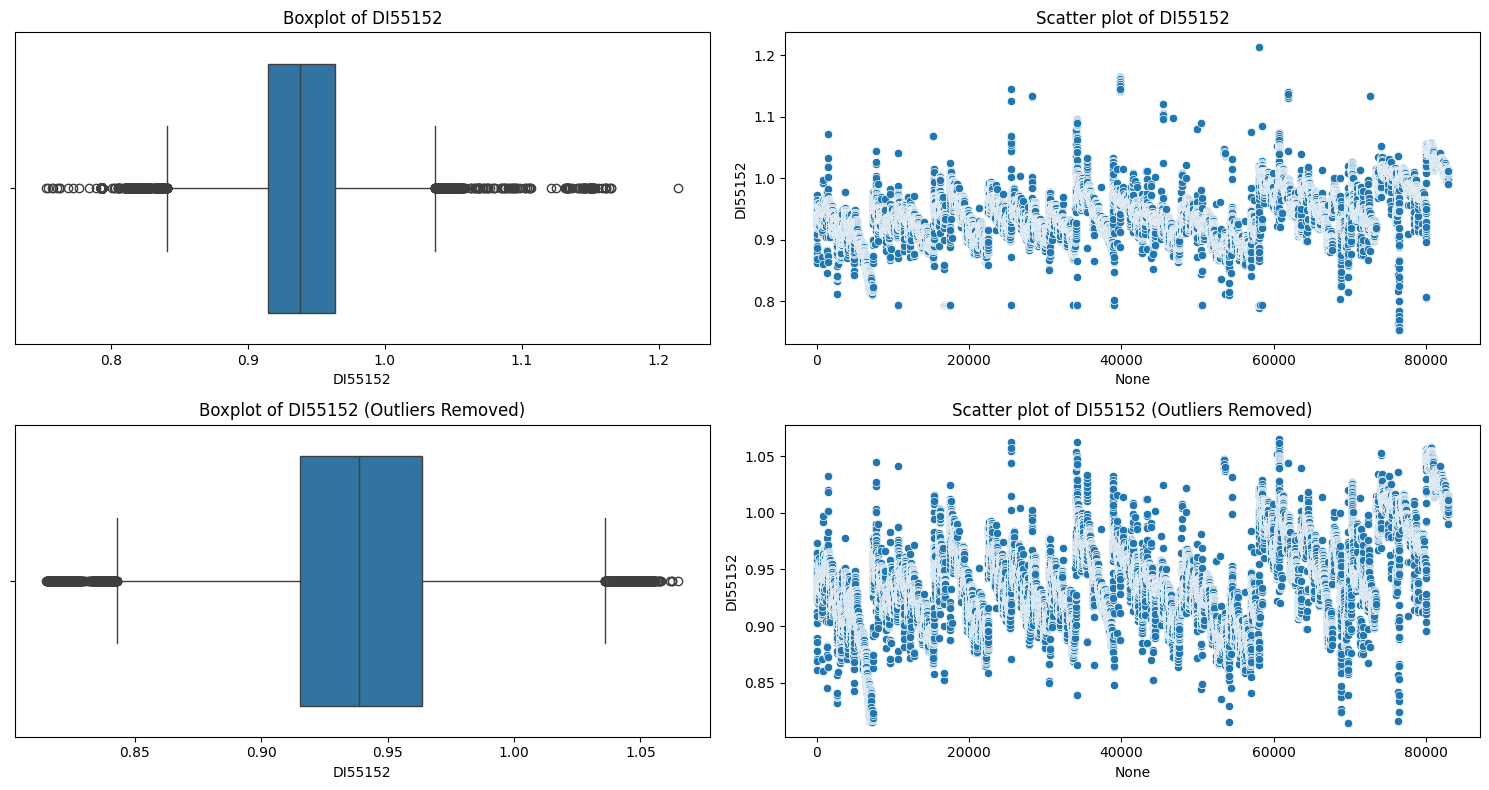

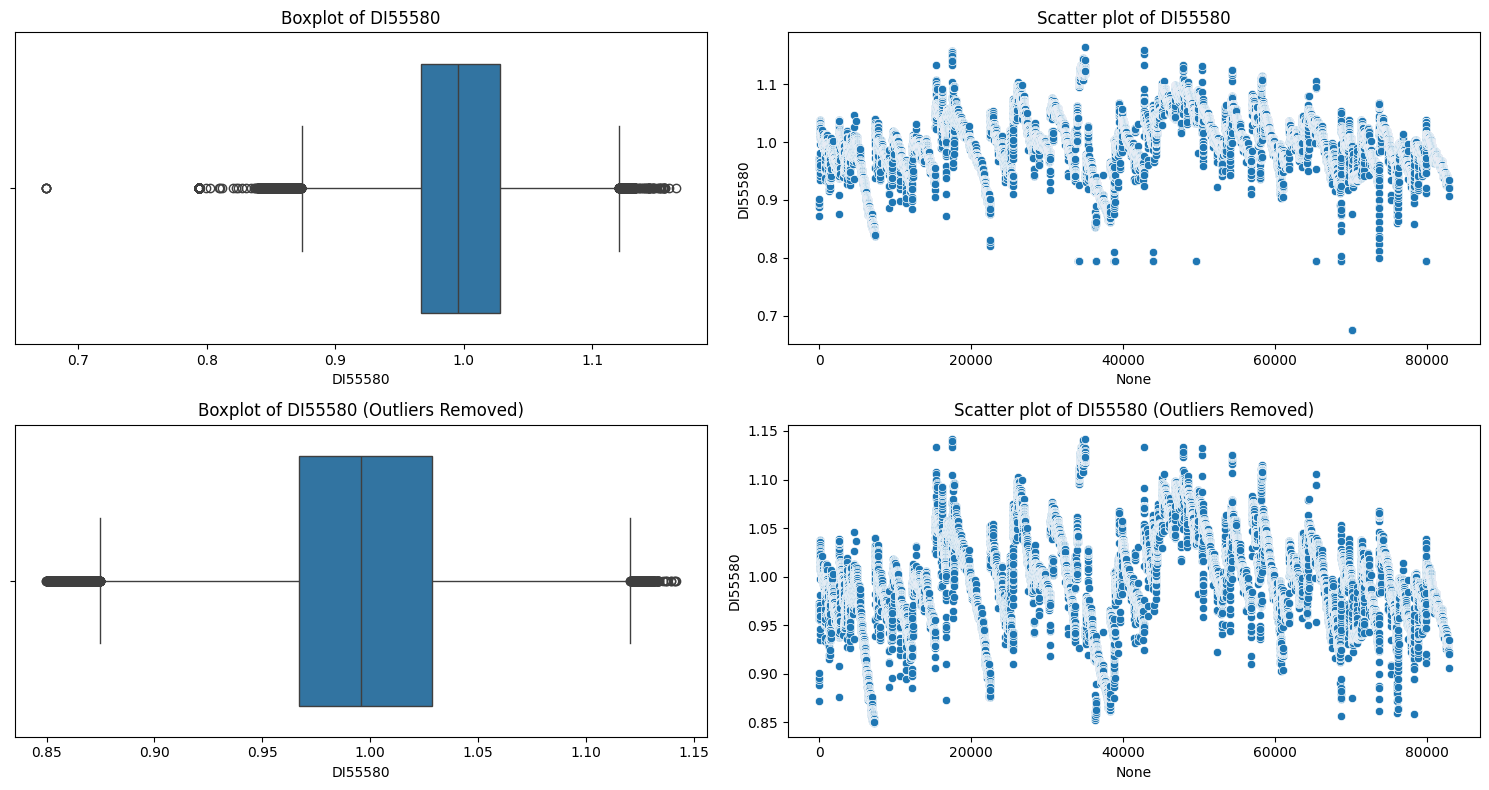

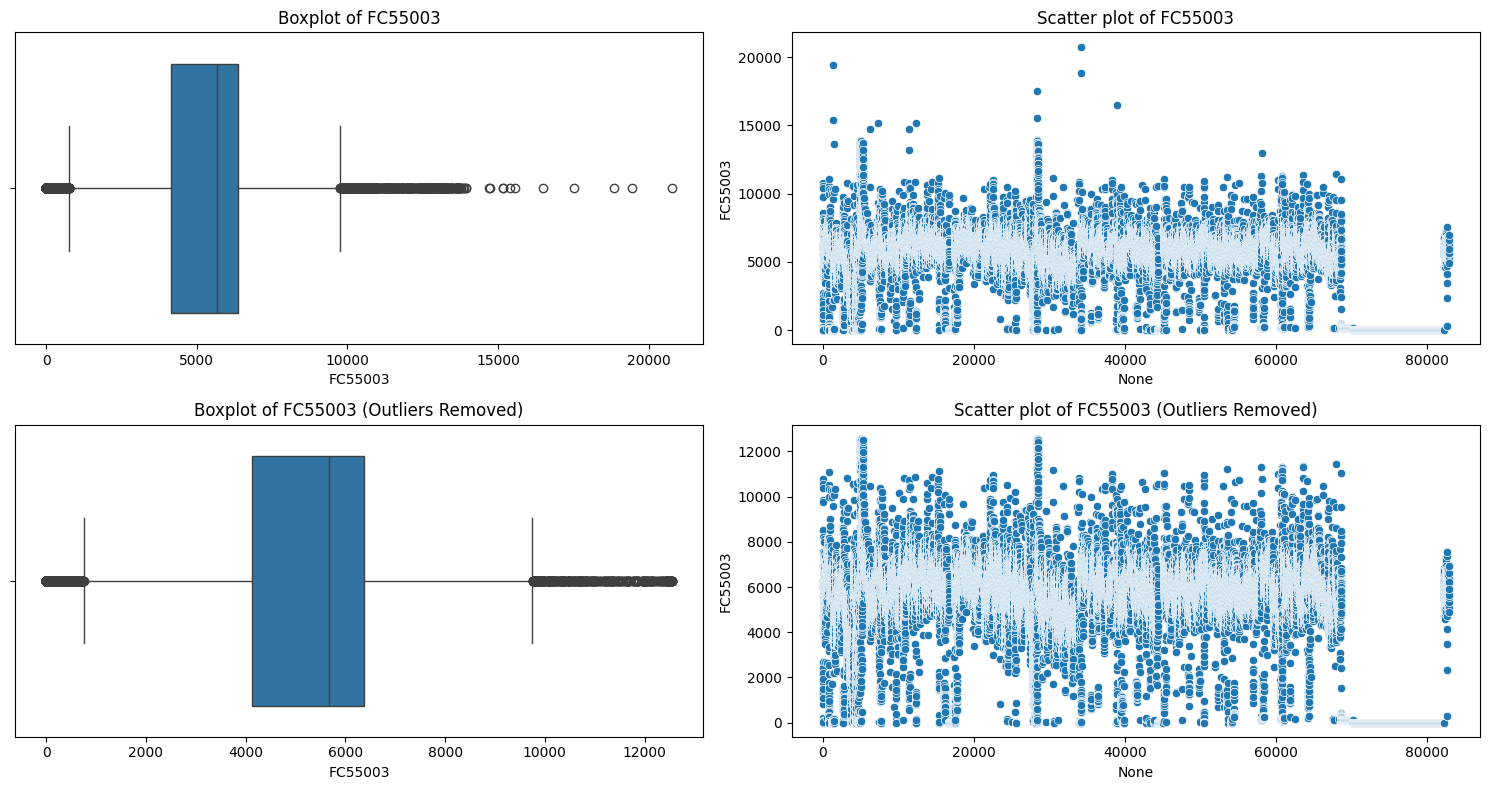

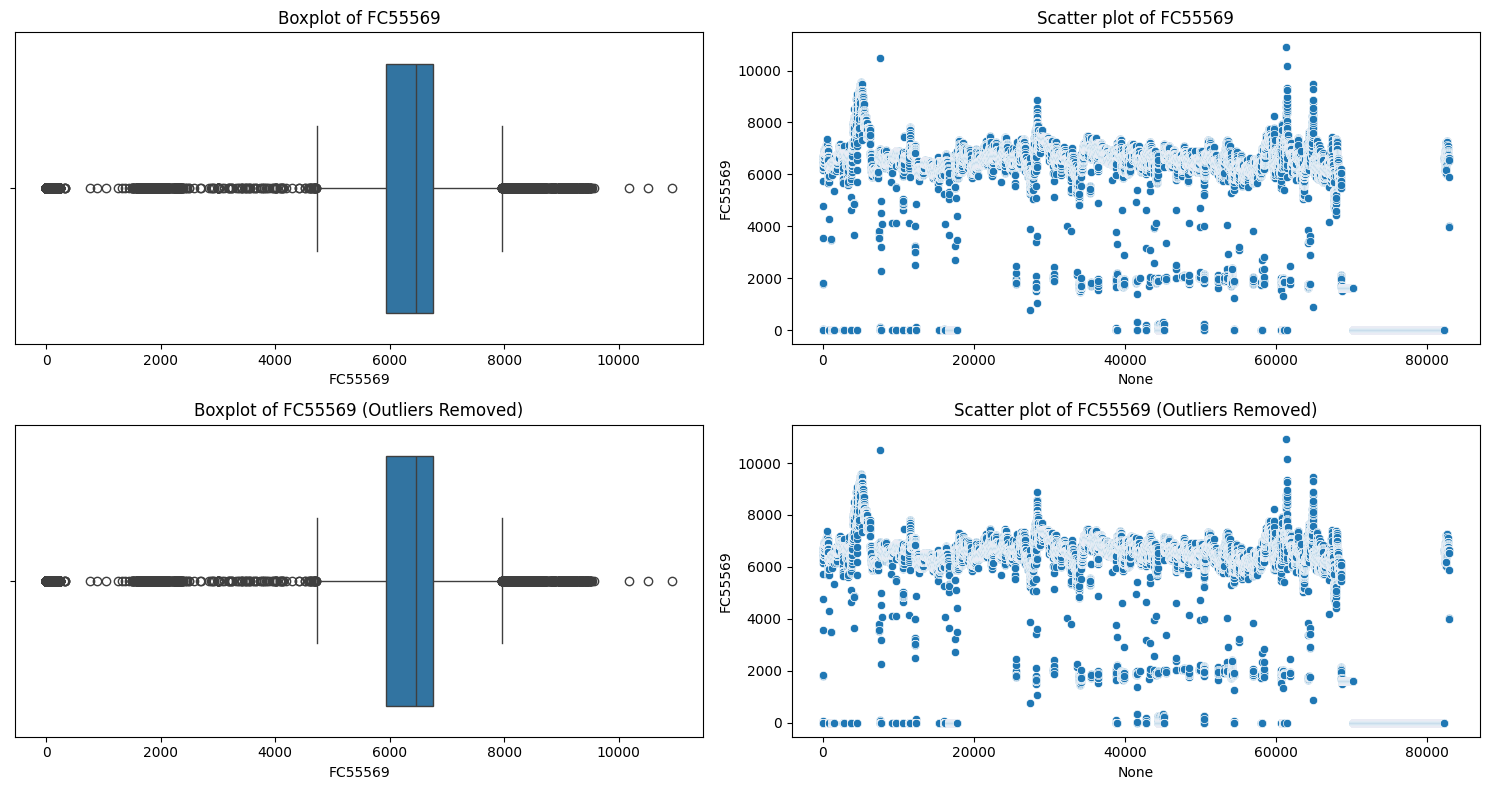

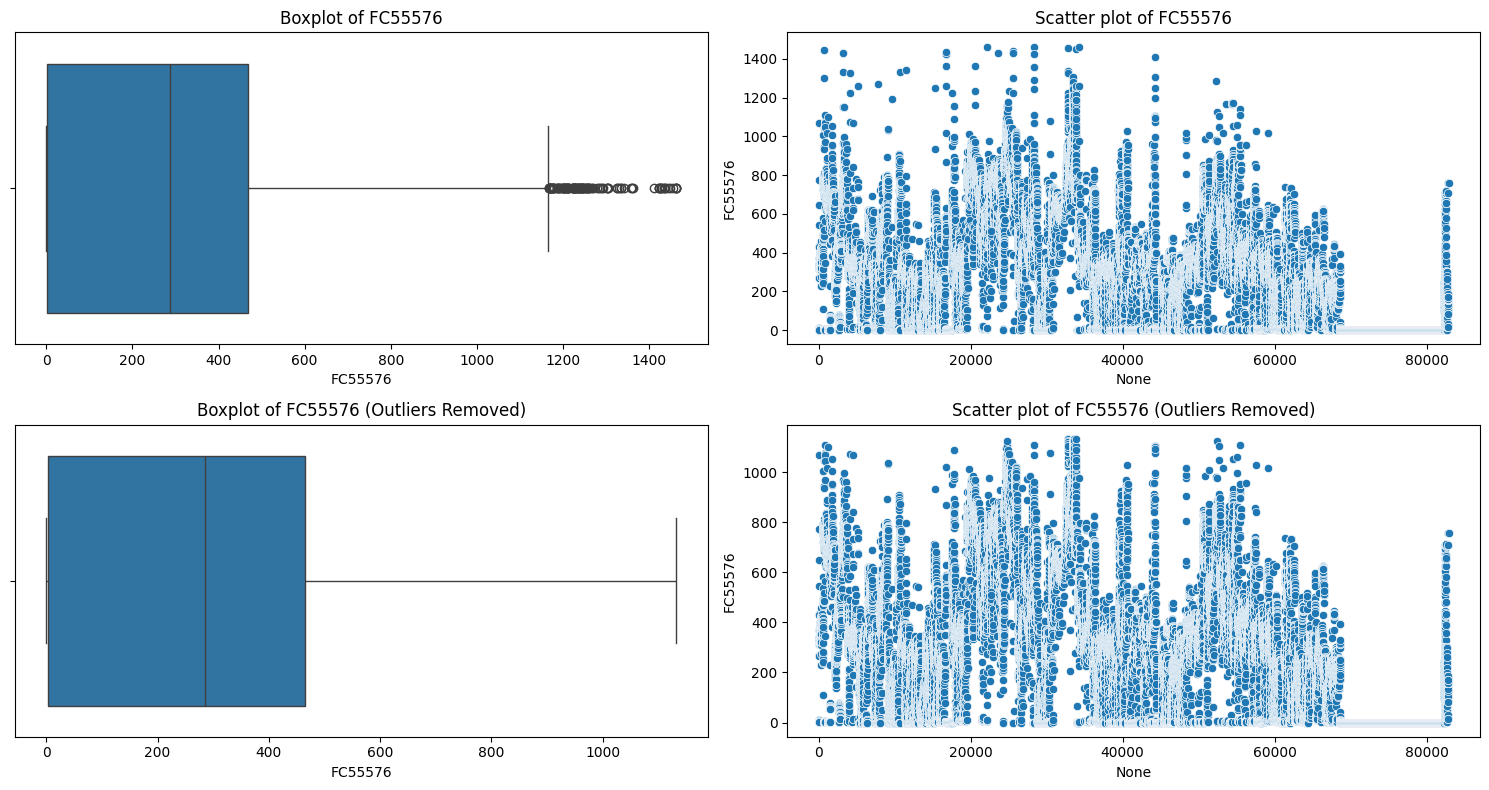

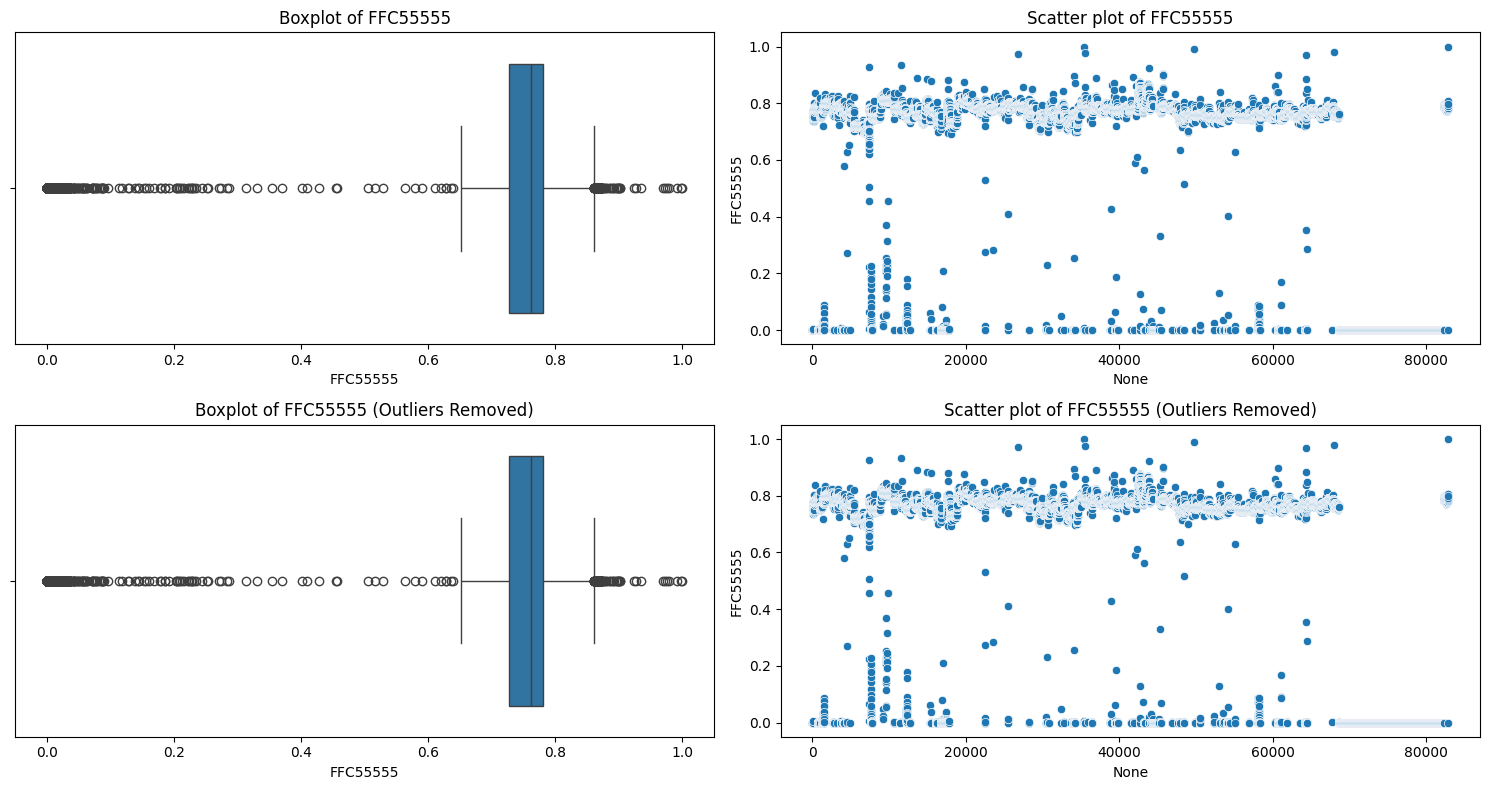

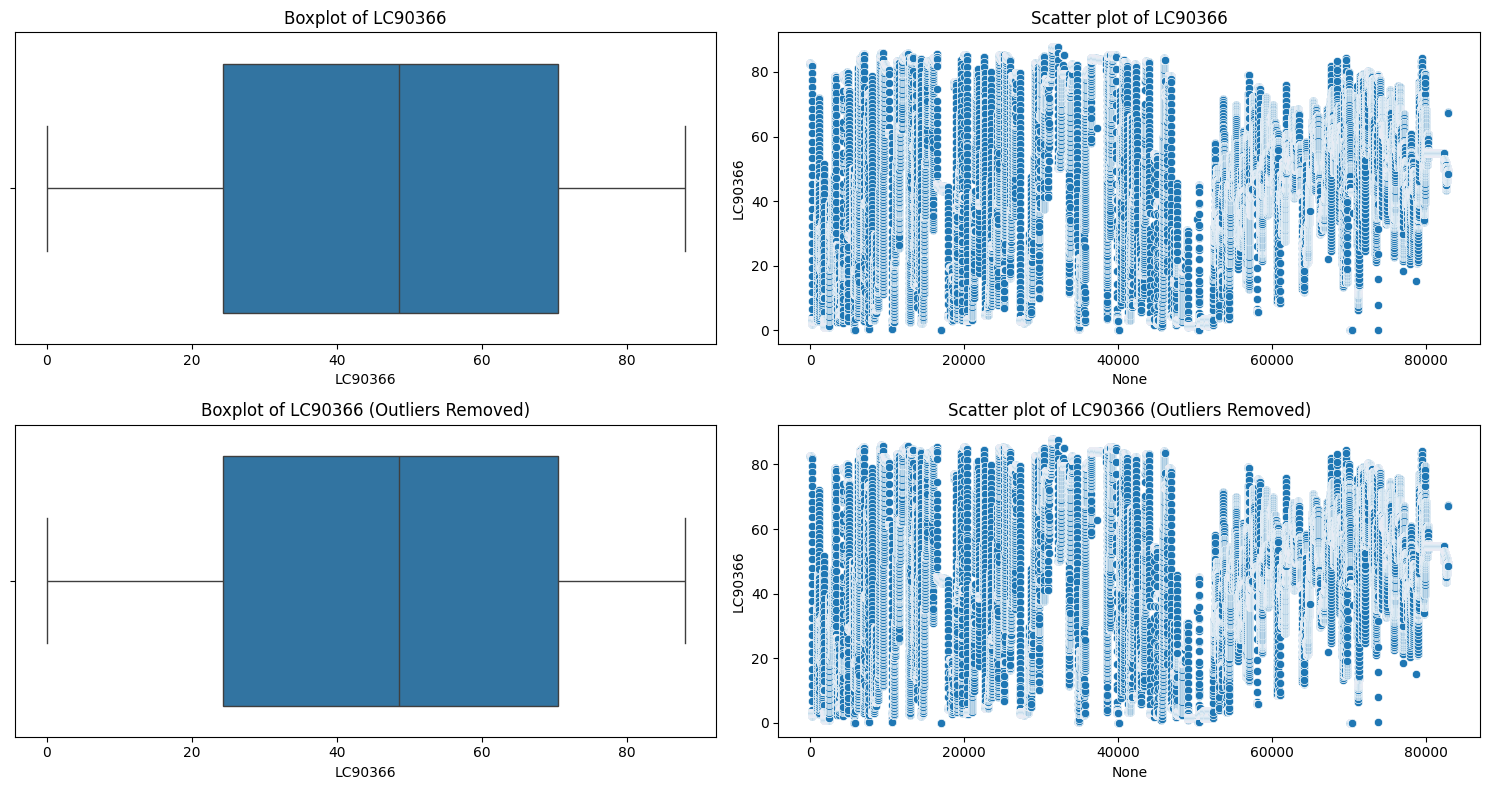

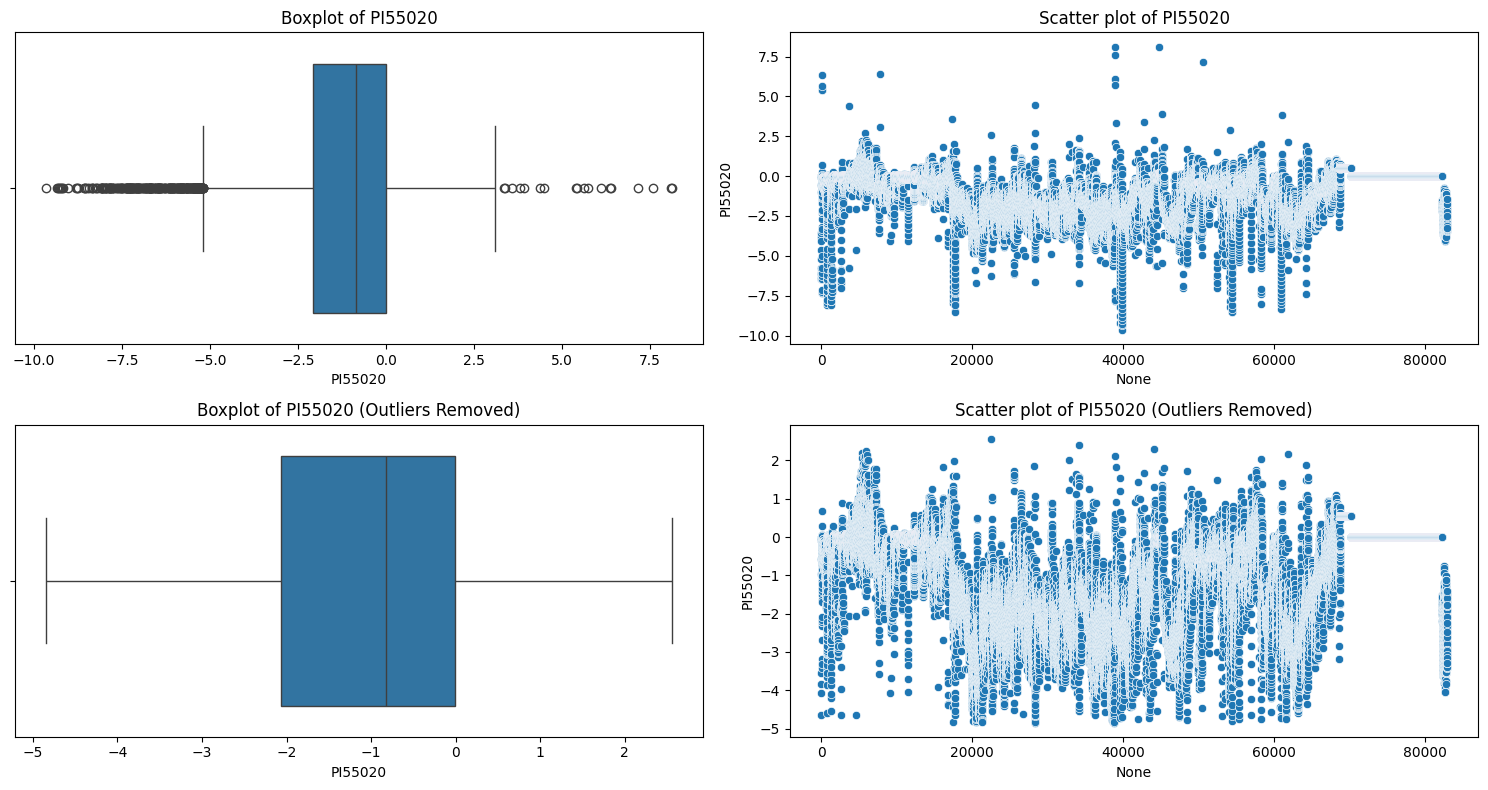

In [8]:

def plot_data(col, data):
    # Check for datetime column
    if pd.api.types.is_datetime64_any_dtype(data[col]):
        print(f"Skipping datetime column: {col}")
        return data[col], None

    # Remove outliers (> 3 standard deviations from the mean)
    mean_col = data[col].mean()
    std_col = data[col].std()
    filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 2, 1)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

    plt.subplot(2, 2, 2)
    sns.scatterplot(x=data[col].index, y=data[col])
    plt.title(f"Scatter plot of {col}")

    plt.subplot(2, 2, 3)
    sns.boxplot(x=filtered_col)
    plt.title(f"Boxplot of {col} (Outliers Removed)")

    plt.subplot(2, 2, 4)
    sns.scatterplot(x=filtered_col.index, y=filtered_col)
    plt.title(f"Scatter plot of {col} (Outliers Removed)")

    plt.tight_layout()
    plt.show()

    return data[col], filtered_col

# Initialize dictionaries to store data
df_plotted = {}
df_plotted_Outliers_removed = {}

# Loop through each column to plot the data
for col in df_outlierHandling.columns:
    plotted, plotted_filtered = plot_data(col, df_outlierHandling)
    df_plotted[col] = plotted
    if plotted_filtered is not None:
        df_plotted_Outliers_removed[col] = plotted_filtered

# Convert the dictionaries to DataFrames
df_plotted = pd.DataFrame(df_plotted)
df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)

# Ensure "Date" column is present in df_plotted_Outliers_removed
if "Date" in df_outlierHandling.columns and "Date" not in df_plotted_Outliers_removed.columns:
    df_plotted_Outliers_removed["Date"] = df_outlierHandling["Date"]


In [9]:
# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], data[col]  # keep datetime columns as they are

# def plot_data(col, data, remove_outliers=False):
#     if pd.api.types.is_datetime64_any_dtype(data[col]):
#         print(f"Skipping datetime column: {col}")
#         return data[col], None  # keep datetime columns as they are

#     # Remove outliers (> 3 standard deviations from the mean)
#     mean_col = data[col].mean()
#     std_col = data[col].std()
#     filtered_col = data[col][((data[col] - mean_col) / std_col).abs() <= 3]

#     plt.figure(figsize=(15, 8))

#     plt.subplot(2, 2, 1)
#     sns.boxplot(x=data[col])
#     plt.title(f"Boxplot of {col}")

#     plt.subplot(2, 2, 2)
#     sns.scatterplot(x=data[col].index, y=data[col])
#     plt.title(f"Scatter plot of {col}")

#     plt.subplot(2, 2, 3)
#     sns.boxplot(x=filtered_col)
#     plt.title(f"Boxplot of {col} (Outliers Removed)")

#     plt.subplot(2, 2, 4)
#     sns.scatterplot(x=filtered_col.index, y=filtered_col)
#     plt.title(f"Scatter plot of {col} (Outliers Removed)")

#     plt.tight_layout()
#     plt.show()

#     return data[col], filtered_col

# # Create empty dictionaries to hold the Series
# df_plotted = {}
# df_plotted_Outliers_removed = {}

# # Loop through each column to plot the data
# for col in df_outlierHandling.columns:
#     plotted, plotted_filtered = plot_data(col, df_outlierHandling, remove_outliers=True)
#     df_plotted[col] = plotted
#     if plotted_filtered is not None:
#         df_plotted_Outliers_removed[col] = plotted_filtered

# # Convert the dictionaries to DataFrames
# df_plotted = pd.DataFrame(df_plotted)
# df_plotted_Outliers_removed = pd.DataFrame(df_plotted_Outliers_removed)




In [10]:
df_outlierHandling = df_plotted_Outliers_removed.copy()

In [11]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0   425_pct_Al       82888          81640       1248        1.505646
1        Al2O3       82888          82847         41        0.049464
2   C4_pct_Eth       82888          82383        505        0.609256
3   C4_pct_H2O       82888          82223        665        0.802287
4   C4_pct_Hex       82888          81909        979        1.181112
5      DI55102       82888          82863         25        0.030161
6      DI55152       82888          81862       1026        1.237815
7      DI55580       82888          82414        474        0.571856
8      FC55003       82888          82742        146        0.176141
9      FC55569       82888          82888          0        0.000000
10     FC55576       82888          82749        139        0.167696
11    FFC55555       82888          82888          0        0.000000
12     LC90366       82888          82888          0        0.000000
13     PI55020       82888        

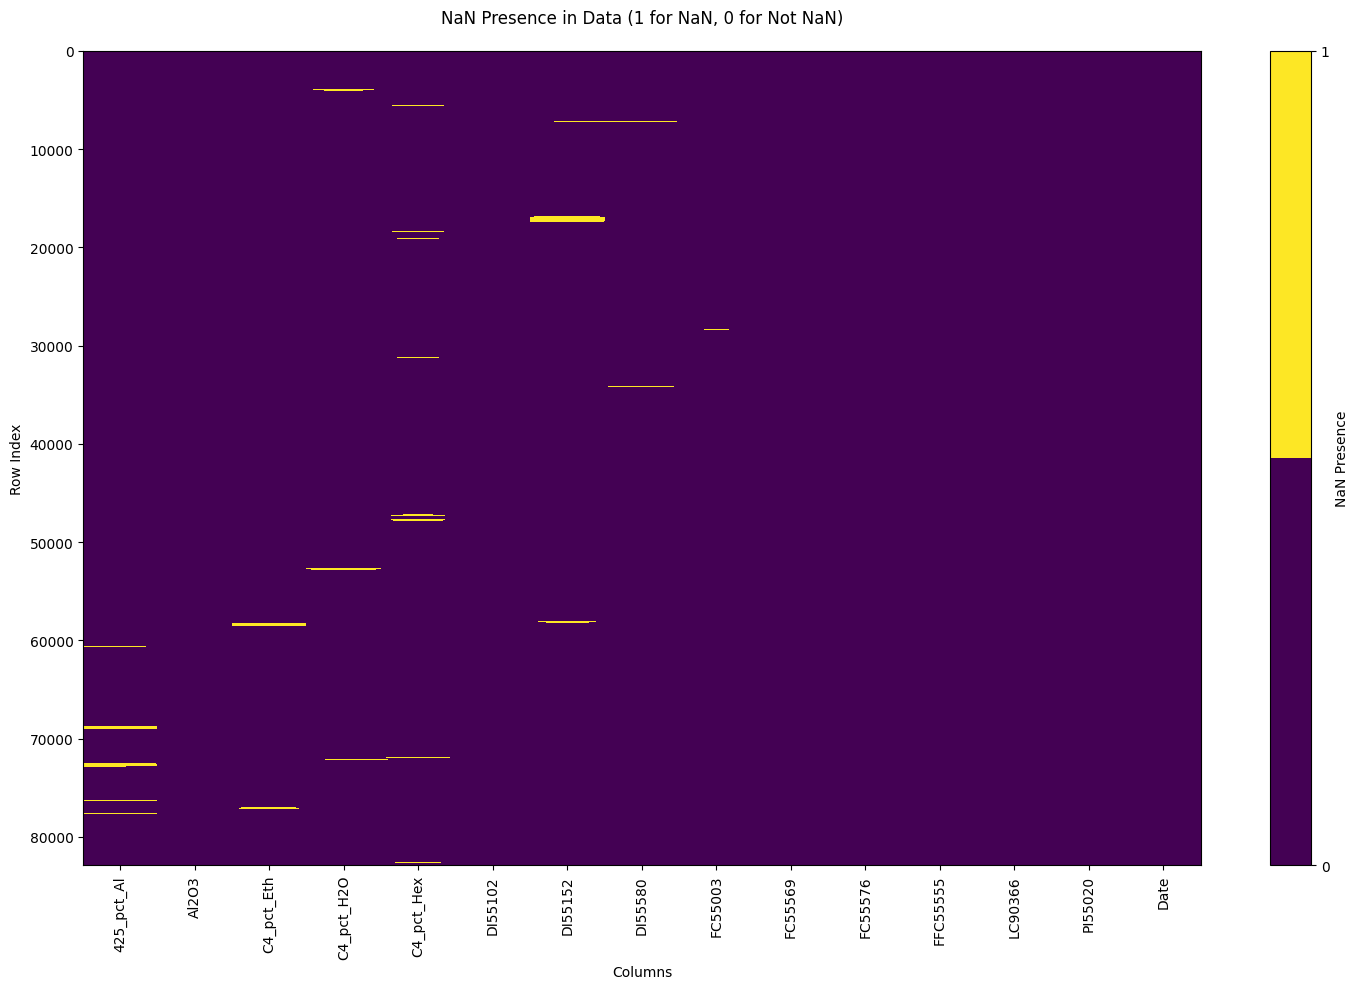

In [12]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [13]:
df_outlierHandling = df_outlierHandling.dropna().copy()



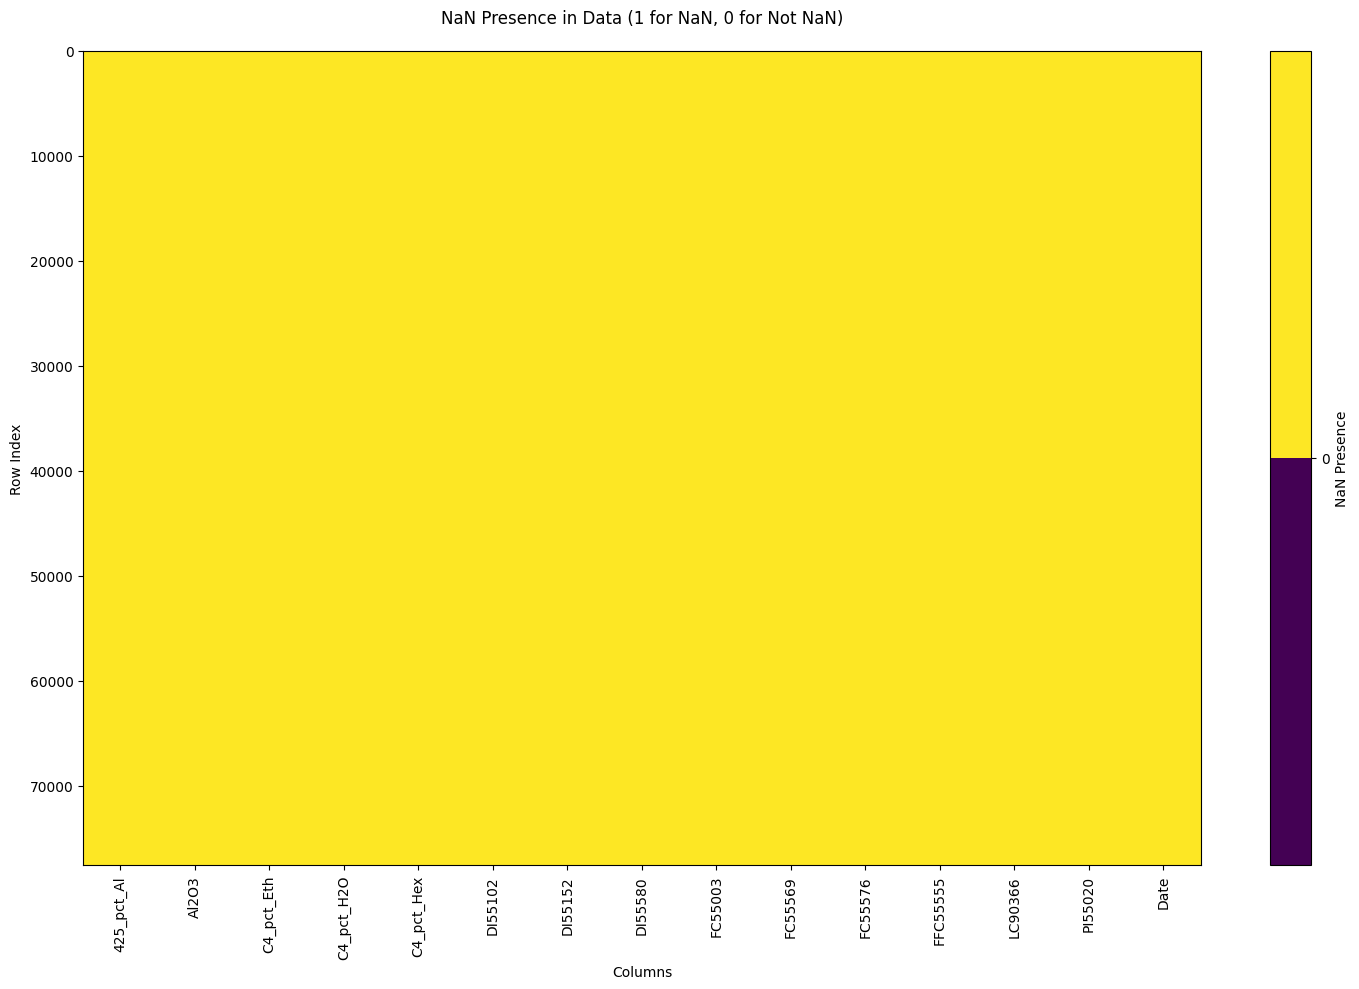

In [14]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_outlierHandling.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_outlierHandling.shape[1]), df_outlierHandling.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [15]:
# Calculate the statistics for each column in df_outlierHandling
total_rows = len(df_outlierHandling)
non_nan_count = df_outlierHandling.count()
nan_count = df_outlierHandling.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_outlierHandling.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

            ID  total_rows  non_nan_count  nan_count  nan_percentage
0   425_pct_Al       77594          77594          0             0.0
1        Al2O3       77594          77594          0             0.0
2   C4_pct_Eth       77594          77594          0             0.0
3   C4_pct_H2O       77594          77594          0             0.0
4   C4_pct_Hex       77594          77594          0             0.0
5      DI55102       77594          77594          0             0.0
6      DI55152       77594          77594          0             0.0
7      DI55580       77594          77594          0             0.0
8      FC55003       77594          77594          0             0.0
9      FC55569       77594          77594          0             0.0
10     FC55576       77594          77594          0             0.0
11    FFC55555       77594          77594          0             0.0
12     LC90366       77594          77594          0             0.0
13     PI55020       77594        

In [16]:
# 40127  - All Tags included - 3/9/24

num_columns = df_outlierHandling.shape[1]
print("Number of features:", num_columns)

Number of features: 15


## Add Columns to Describe Butanol and Decanol Content

Binary data must be added after Outlier handleing :) 

In [17]:
# Add new column 'B', with 1 if 'A' > 25, else 0
# df_outlierHandling['C4_Spec'] = np.where(df_outlierHandling['Butanol'] < 62, 1, 0)
# df_outlierHandling['C10_Spec'] = np.where(df_outlierHandling['Decanol'] < 5, 1, 0)

In [18]:
df_outlierHandling.to_csv('contData_clean.csv', index=False)

df_outlierHandling.columns

Index(['425_pct_Al', 'Al2O3', 'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex',
       'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55569', 'FC55576',
       'FFC55555', 'LC90366', 'PI55020', 'Date'],
      dtype='object')

In [19]:
saoSelect = ['Date', '425_pct_Al', 'Al2O3', 
            #  'M_Value', 
             'C4_pct_Eth', 'C4_pct_H2O', 'C4_pct_Hex', 
            #  'HydWtr_pct_Ammonia', 
            #  'HydWtr_Na2O'
             ]

fb554Select = ['Date' 
            #    'Butanol', 'Ethanol', 'Hexanol', 'Octanol'
               ]

unitSelect = ['Date', 
              'FC55569',
              'DI55102', 'DI55152', 'DI55580', 'FC55003', 'FC55576', 'FFC55555',
              'LC90366', 'PI55020'
              ]



df_clean_425 = df_outlierHandling[saoSelect].copy()

df_clean_554 = df_outlierHandling[fb554Select].copy()

df_clean_unit = df_outlierHandling[unitSelect].copy()

num_columns_425 = df_clean_425.shape[1]
num_columns_554 = df_clean_554.shape[1]
num_columns_unit = df_clean_unit.shape[1]
num_columns_total = num_columns_554 + num_columns_425 + num_columns_unit


print("Number of features:", num_columns_total)

print("Number of features - ['Date']*2:", num_columns_total-2)


Number of features: 17
Number of features - ['Date']*2: 15


In [20]:
# df_clean_425.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_425Data_clean.csv', index=False)

# df_clean_554.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_554Data_clean.csv', index=False)

# df_clean_unit.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\cont_unitData_clean.csv', index=False)


In [21]:
# bordeCode

df_clean_425.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_425Data_clean.csv', index=False)

df_clean_554.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_554Data_clean.csv', index=False)

df_clean_unit.to_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model STEAM - FC55569\5 Preprocessing - Slecected Features\Continuous Data\cont_unitData_clean.csv', index=False)

In [22]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-06 01:56:03.283748
